In [1]:
import numpy as np
import matplotlib
font = {'size': 11.0}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit
import uncertainties.unumpy as unp
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)
from uncertainties import ufloat
import scipy.constants as const

In [2]:
if False:
    U,phi,nu = np.genfromtxt('data/test/data1.txt'
                  ,unpack=True
                  ,delimiter = ","
                  ,skip_header = 1
                   )
df1 = pd.read_csv('data/data1.txt'
                 ,header =[0])
df2 = pd.read_csv('data/data2.txt'
                 ,header =[0])
df3 = pd.read_csv('data/data3.txt'
                 ,header =[0])

Bei df1:  
$U_1 = 346 mV$, $R_1 = 9,94 kΩ$ und $R_N = 99,3 kΩ$  
Bei df2:  
$U_1 = 346 mV$, $R_1 = 33,3 kΩ$ und $R_N = 99,3 kΩ$

\begin{equation*}
    V' = \frac{U_A}{U_E} = -\frac{R_N}{R_1}
\end{equation*}

In [3]:
def compute_V(df):
    """Caculates the Amplification for given Currents.

        Parameters
        ----------
        U_E: float
            The Input Current
        U_A: float
            The Output Current

        Returns
        -------
        V: float
            The Amplification
    """
    if 'V' not in df.columns:
        df['V'] = df['U_A']/df['U_E']
    return df['V']

In [4]:
def f(x,a,b):
    """Calculates an exponential

        Parameters
        ----------
        x: float
            X-Value
        a: float
            Faktor
        b: float
            Exponent

        Returns
        -------
        f(x): float
            The value of the Funktion
    """
    
    return a*x**b

In [5]:
params1,cov = curve_fit(f,df1['nu'][12:],compute_V(df1[12:]))
errors = np.sqrt(np.diag(cov))
params1_err = unp.uarray(params1,errors)

/var/folders/pt/b3my3xy523d1fhjwwm6z9j1c0000gn/T/ipykernel_29354/1801440196.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['V'] = df['U_A']/df['U_E']


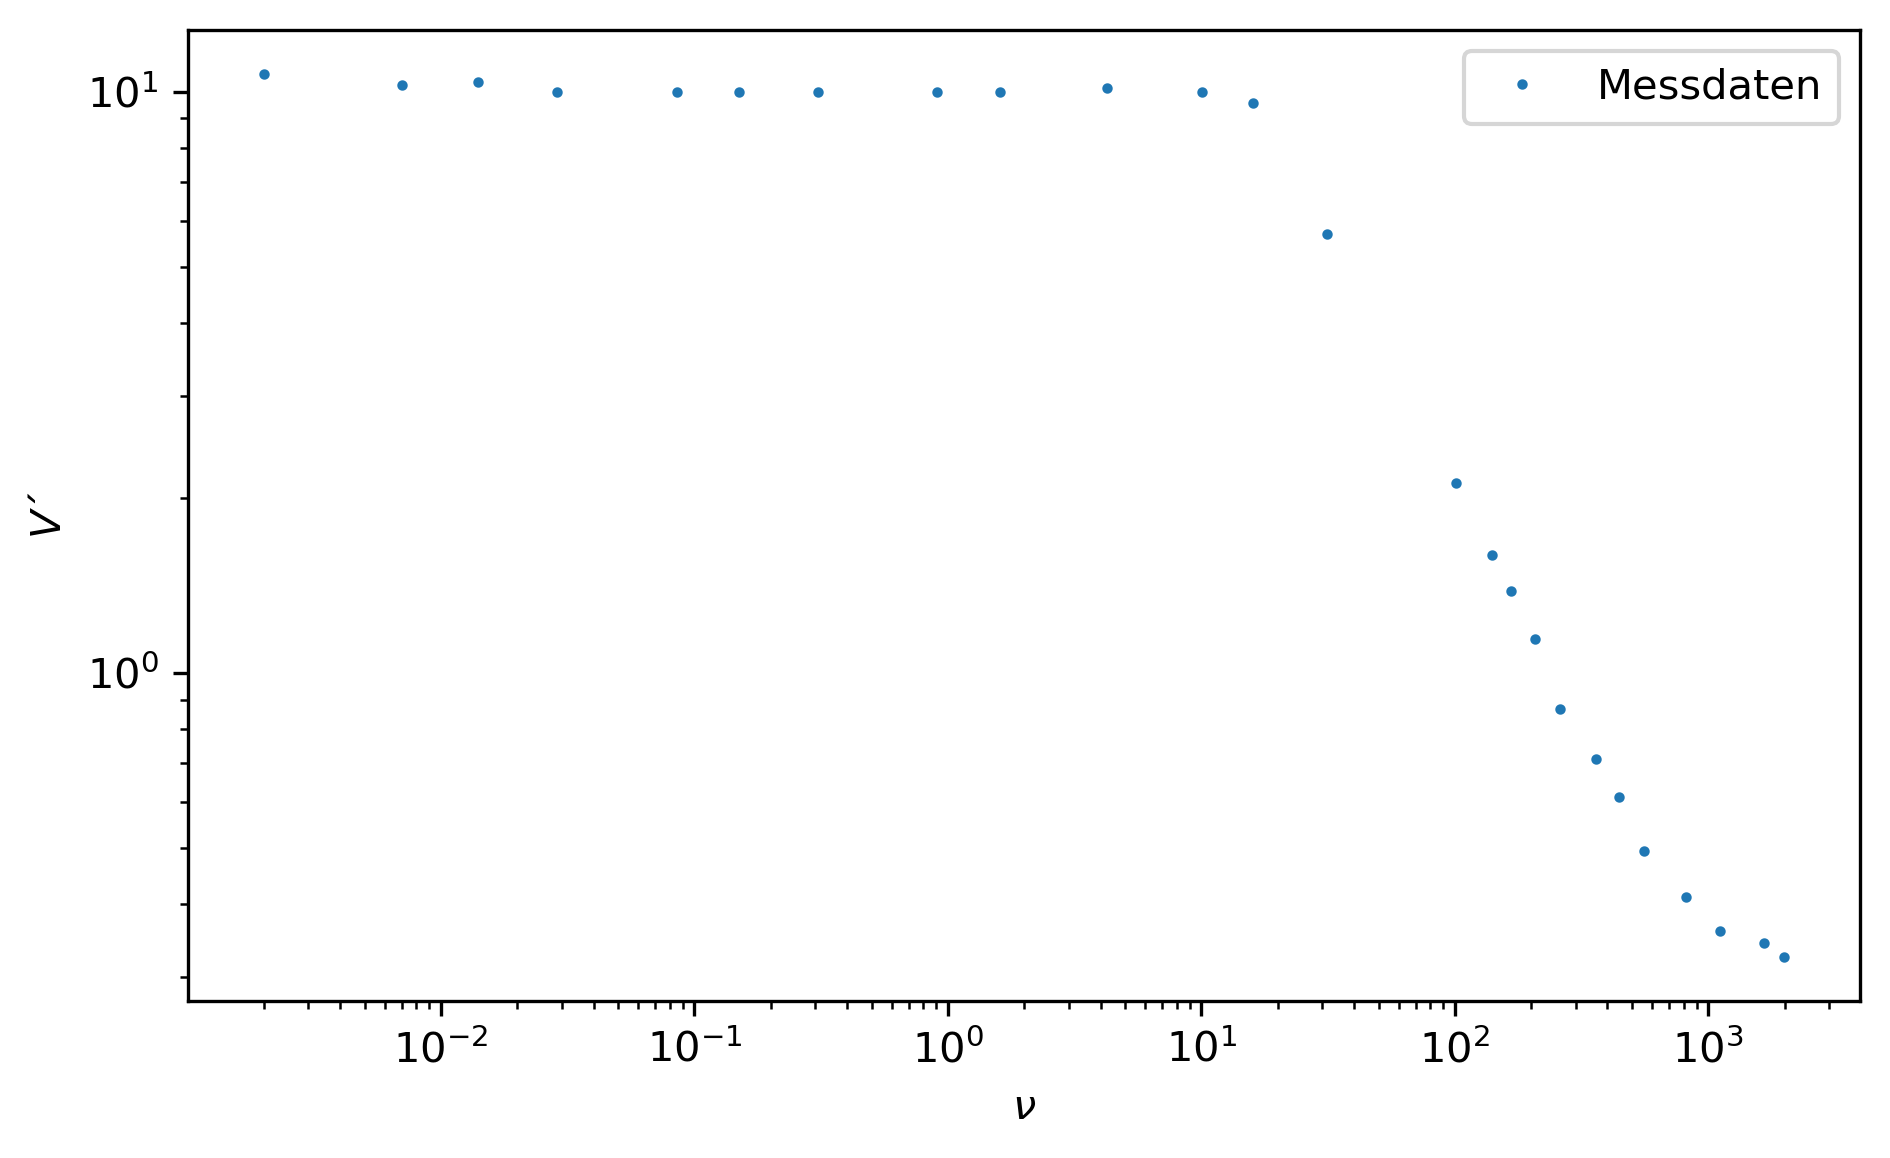

In [6]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df1['nu']
         ,compute_V(df1)
         ,'.'
         ,ms = 3
         ,label = 'Messdaten'
        )
if False:
    plt.plot(df2['nu']
             ,f(df1['nu'],*params1)
             ,'--'
             ,ms = 3
             ,label = 'Fit'
            )
plt.xlabel(r'$\nu$')
plt.ylabel(r'$V´$')
plt.legend(loc = 'best')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()


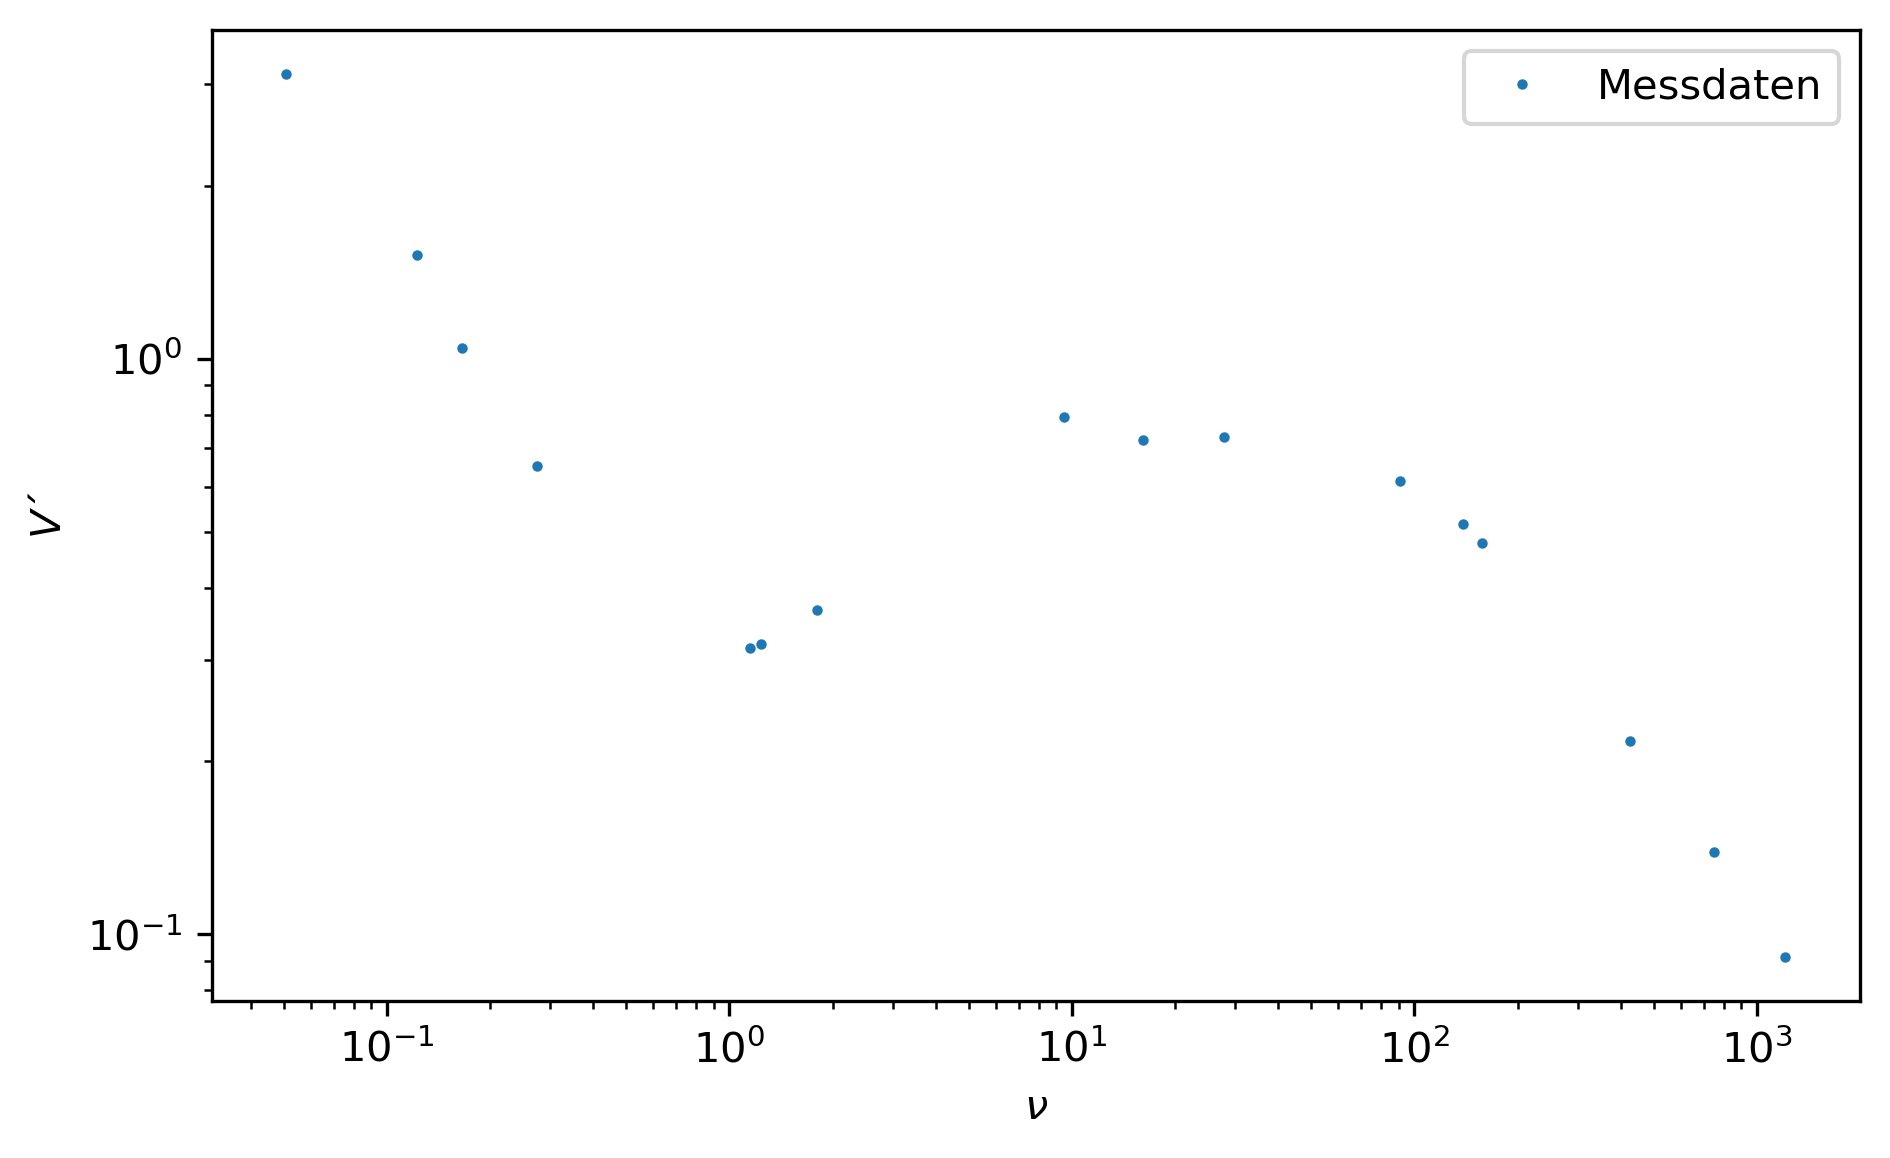

In [7]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df2['nu']
         ,compute_V(df2)
         ,'.'
         ,ms = 3
         ,label = 'Messdaten'
        )
if False:
    plt.plot(df2['nu']
             ,f(df1['nu'],*params1)
             ,'--'
             ,ms = 3
             ,label = 'Fit'
            )
plt.xlabel(r'$\nu$')
plt.ylabel(r'$V´$')
plt.legend(loc = 'best')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()

In [8]:
df2

,U_E,U_A,nu,V
0,7.04,22.000,0.0509,3.125000
1,7.12,10.800,0.1220,1.516854
2,7.12,7.440,0.1660,1.044944
3,7.12,4.640,0.2740,0.651685
4,7.12,2.240,1.1500,0.314607
5,7.20,2.640,1.8000,0.366667
6,7.12,2.280,1.2400,0.320225
7,7.68,6.080,9.5000,0.791667
8,8.40,6.080,16.1000,0.723810
9,8.20,6.000,27.8000,0.731707


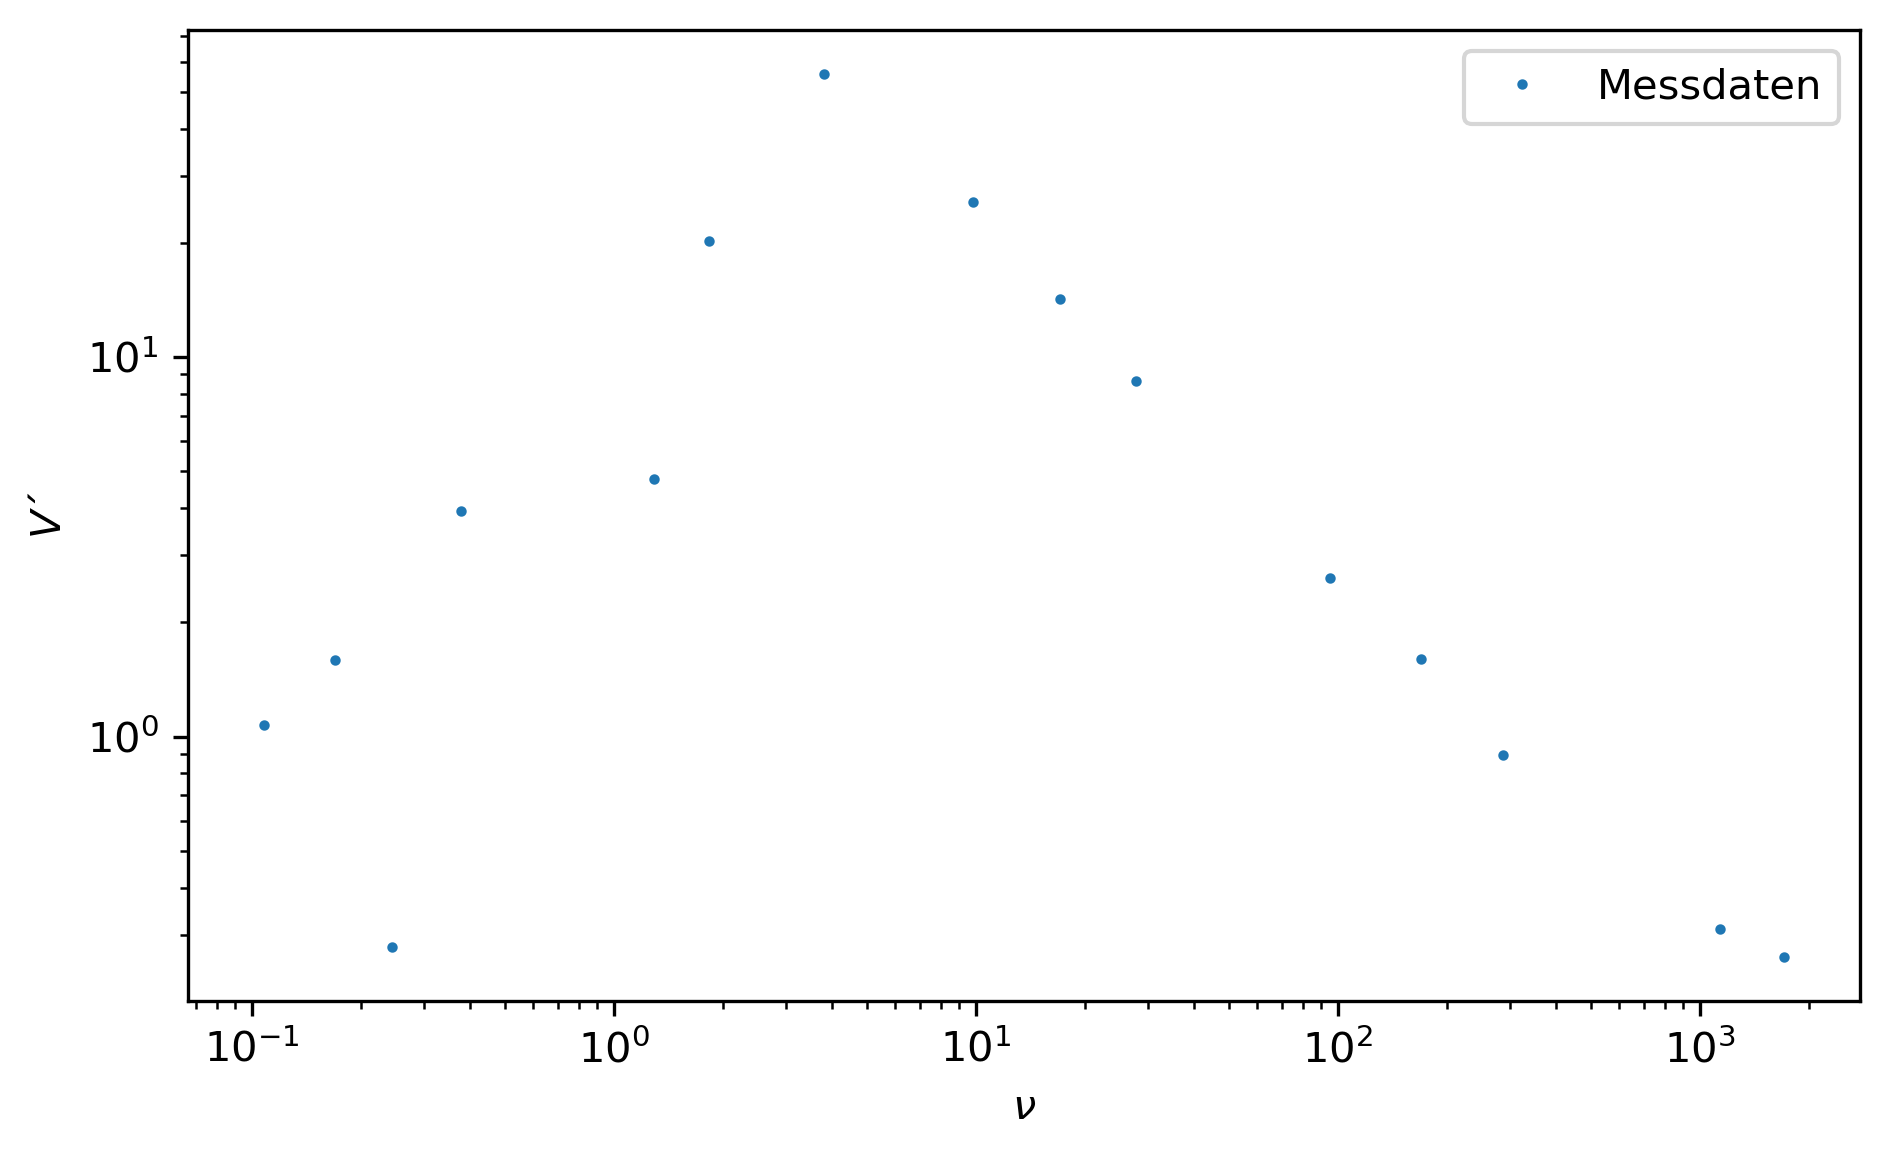

In [9]:
plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df3['nu']
         ,compute_V(df3)
         ,'.'
         ,ms = 3
         ,label = 'Messdaten'
        )
if False:
    plt.plot(df3['nu']
             ,f(df1['nu'],*params1)
             ,'--'
             ,ms = 3
             ,label = 'Fit'
            )
plt.xlabel(r'$\nu$')
plt.ylabel(r'$V´$')
plt.legend(loc = 'best')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()